<a href="https://colab.research.google.com/github/sjunc/2025-1-BigData-Team/blob/main/analysis/%EA%B9%80%EB%8F%99%ED%98%81_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [134]:
!git clone https://github.com/sjunc/2025-1-BigData-Team

fatal: destination path '2025-1-BigData-Team' already exists and is not an empty directory.


In [135]:
tdf = pd.read_csv('/content/2025-1-BigData-Team/TitanicData/titanic1309.csv')
tdf.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1215,1216,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
1118,1119,1,3,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.7500,NaN,Q
928,929,1,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S


In [136]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


- Survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- name : 이름
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- ticket : 티켓 번호
- fare : 요금
- cabin : 객실 번호
- embarked : 탑승 항구

# 티켓 값의 상승에 따라 각 지역의 자석과 생존 구분

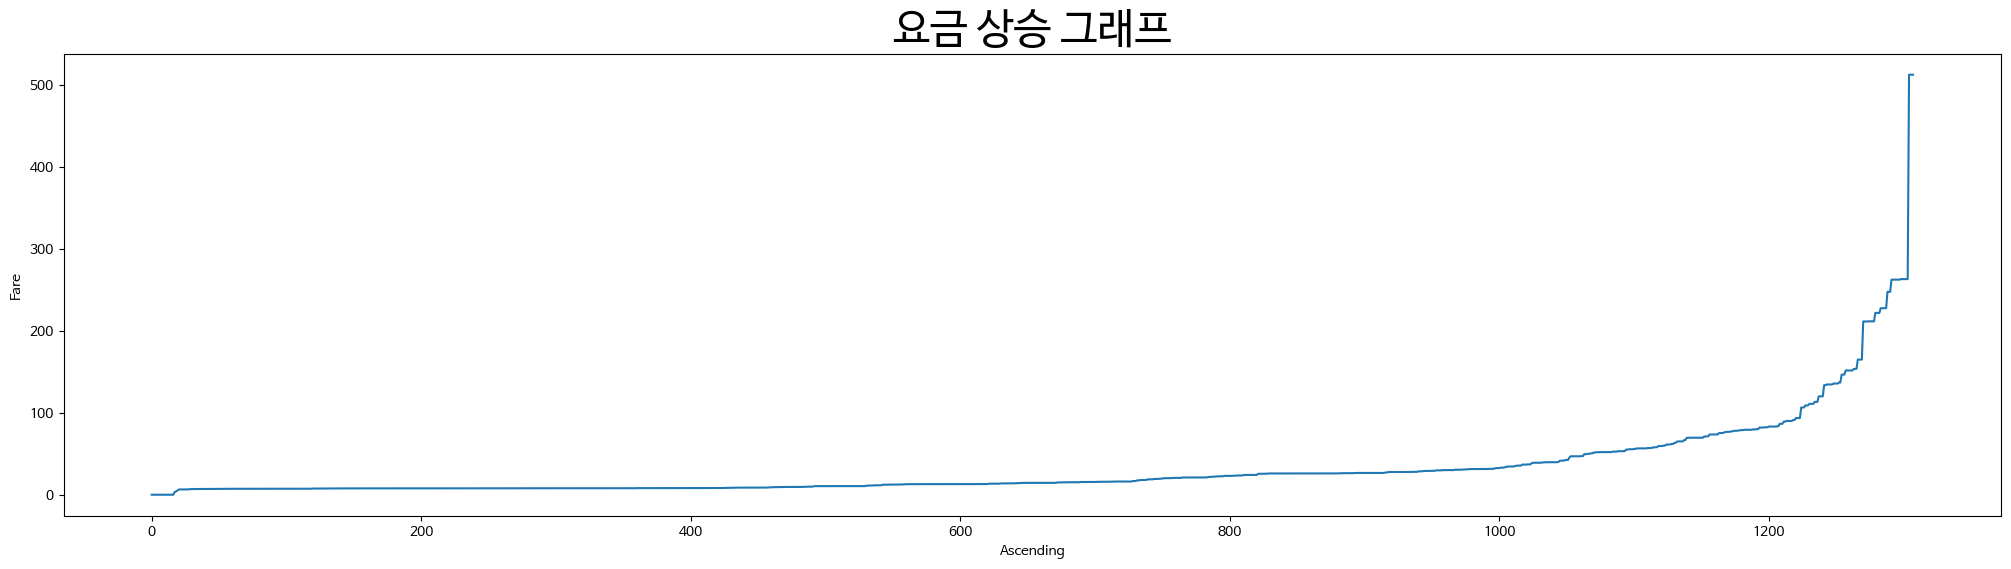

In [137]:
tdf = pd.read_csv('/content/2025-1-BigData-Team/TitanicData/titanic1309.csv')

# 티켔 오름차순으로 그래프 수정
tdf = tdf.sort_values(by=['Fare'] ,ascending=True)
tdf.index = range(len(tdf))

# 티켓 가격 상승 그래프
plt.figure(figsize=(25, 6))
sns.lineplot(x=tdf.index, y='Fare', data=tdf);
plt.xlabel('Ascending')
plt.title("요금 상승 그래프" , fontsize=30);

In [138]:
# ? 왜 최대 500까지 되지? 그럼 돈이 가장 많으면 1등석에다가 생존했겠지?
tdf[['Pclass' , 'Fare', 'Survived','Embarked']].tail(10)
# 이대로 냅두면 막대기 길이가 500 이상이니까 확실한 지역과 생존임으로 이상치을 이전의 최대 길이로 줄어야 겠다.

,Pclass,Fare,Survived,Embarked
1299,1,263.0000,1,S
1300,1,263.0000,0,S
1301,1,263.0000,1,S
1302,1,263.0000,0,S
1303,1,263.0000,1,S
1304,1,512.3292,1,C
1305,1,512.3292,1,C
1306,1,512.3292,1,C
1307,1,512.3292,1,C
1308,3,NaN,0,S


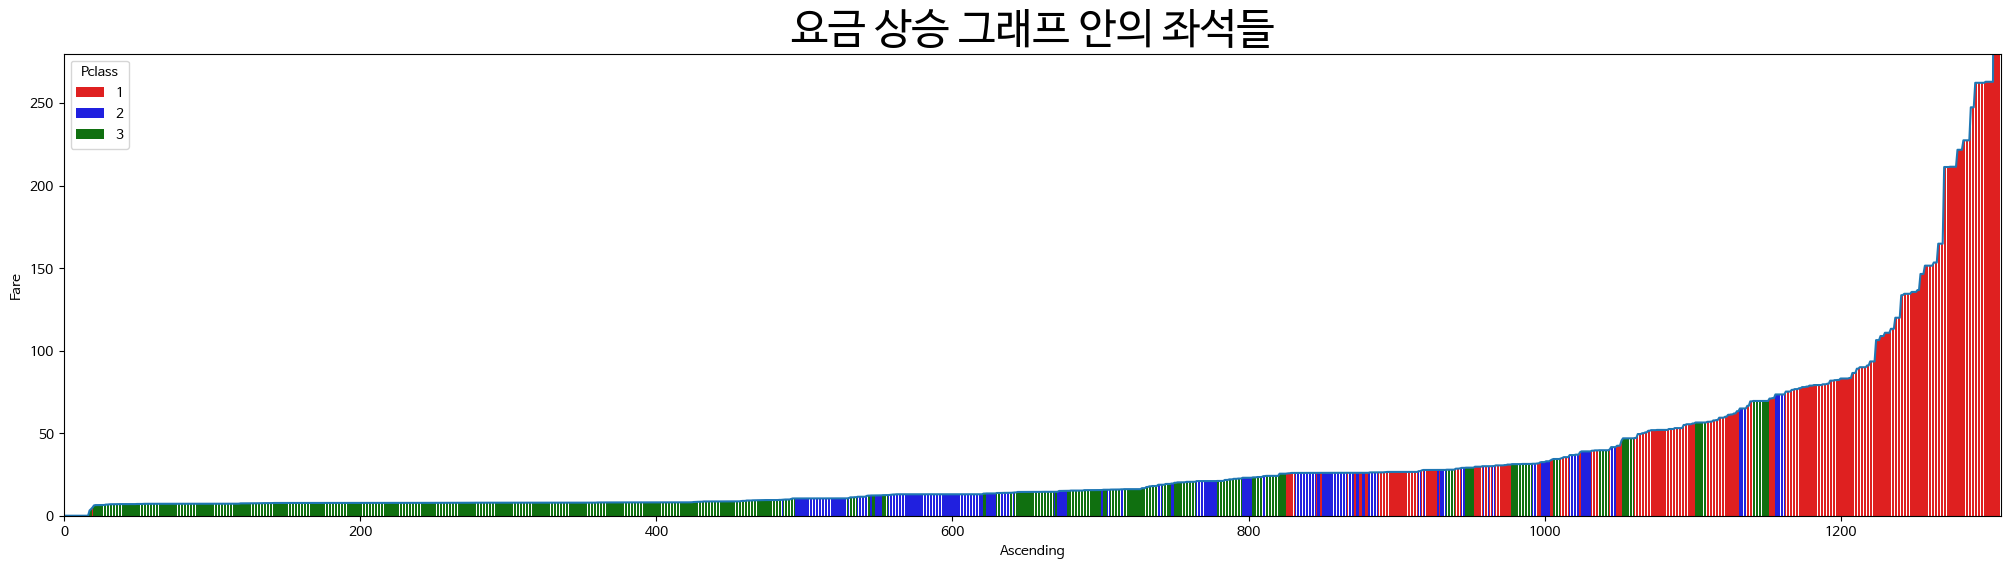

In [139]:
# 가격에 따라 Pclass의 비용

plt.figure(figsize=(25, 6))

sns.lineplot(x=tdf.index, y='Fare', data=tdf)
sns.barplot(x=tdf.index, y='Fare', hue='Pclass', data=tdf, palette={1: 'red', 2: 'blue' , 3:'green'}).set(ylim=(0, 280))
plt.xticks(ticks=np.arange(0, tdf.shape[0], 200), labels=np.arange(0, tdf.shape[0], 200))
plt.xlabel('Ascending')
plt.ylabel('Fare')
plt.title("요금 상승 그래프 안의 좌석들" , fontsize=30);

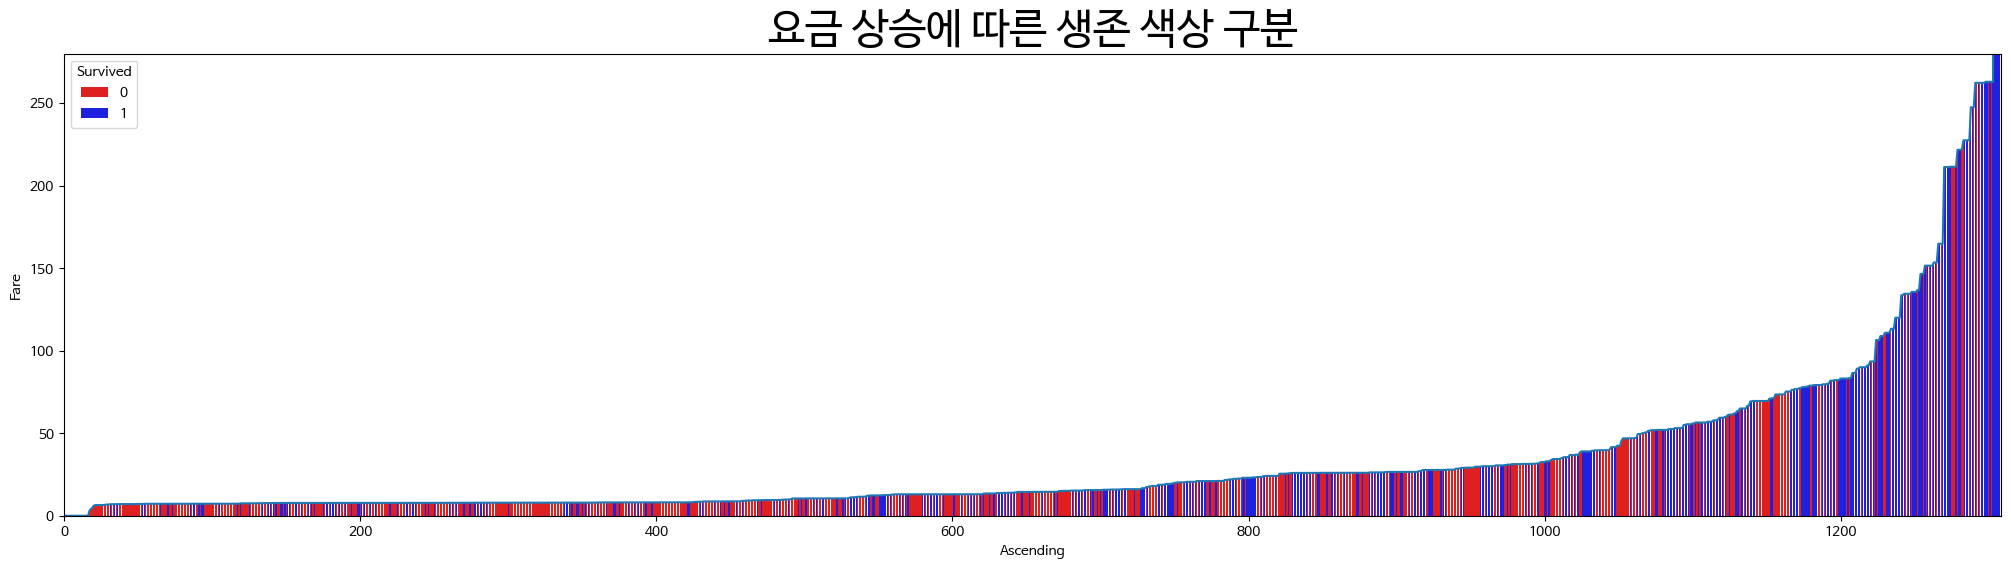

In [140]:
# 티켓 가격에 따른 생존
plt.figure(figsize=(25, 6))
sns.lineplot(x=tdf.index, y='Fare', data=tdf)
sns.barplot(x=tdf.index, y='Fare', hue='Survived', data=tdf, palette={0: 'red', 1: 'blue'}).set(ylim=(0, 280))
plt.xticks(ticks=np.arange(0, tdf.shape[0], 200), labels=np.arange(0, tdf.shape[0], 200));
plt.xlabel('Ascending')
plt.title("요금 상승에 따른 생존 색상 구분" , fontsize=30);

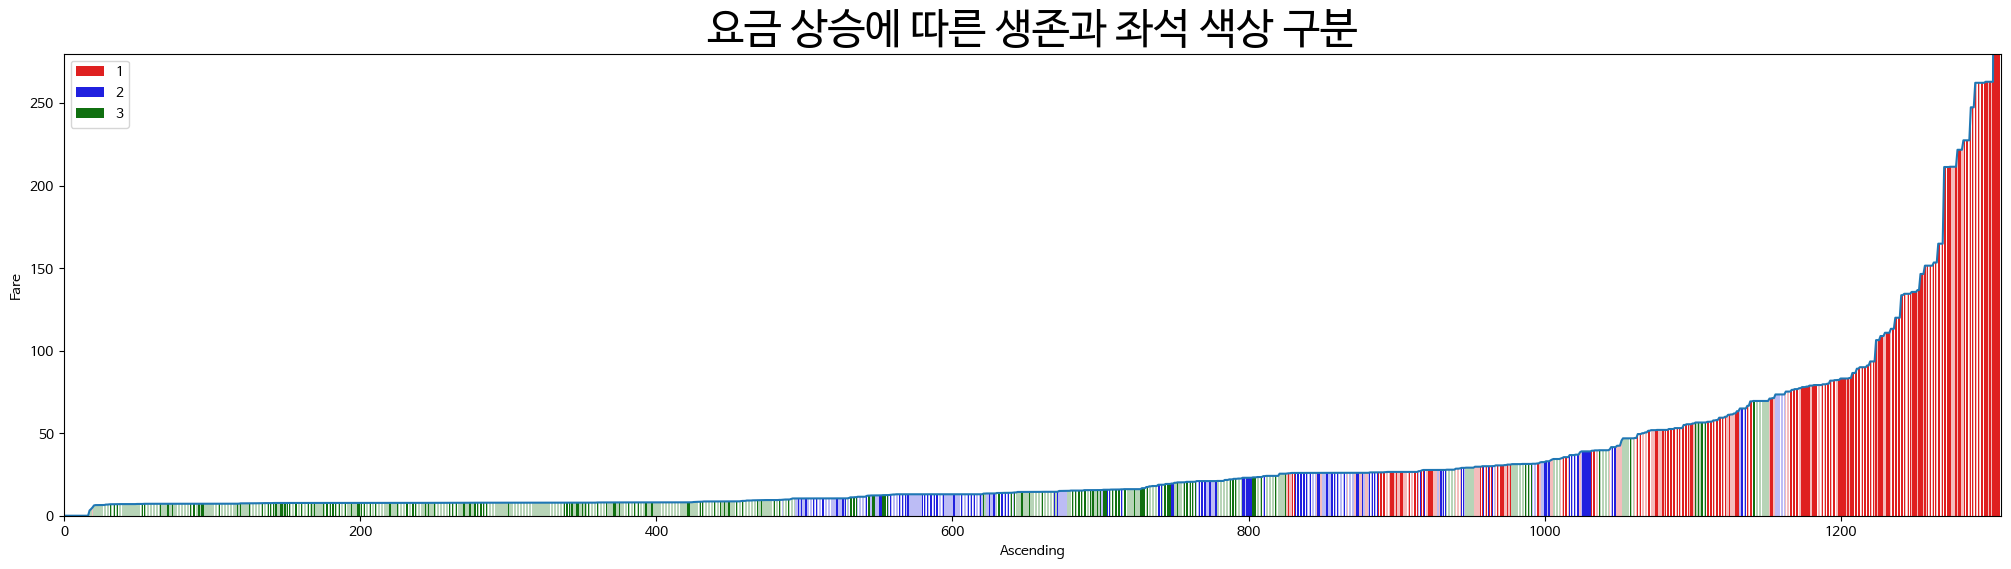

In [141]:
# 가격에 따라 Pclass의 생환자들
plt.figure(figsize=(25, 6))

sns.lineplot(x=tdf.index, y='Fare', data=tdf)
sns.barplot(x=tdf.index, y='Fare', hue='Pclass', data=tdf, palette={1: 'red', 2: 'blue' , 3:'green'}).set(ylim=(0, 280))

# 죽은 사람은 하얀막대기 불투명도 70% 를 입혀 자석과 동시에 생환과 죽음을 동시에 볼 수 있다.
sns.barplot(x=tdf[tdf['Survived'] == 0].index,y='Fare', data=tdf[tdf['Survived'] == 0], color='white' , alpha=0.7)

plt.xticks(ticks=np.arange(0, tdf.shape[0], 200), labels=np.arange(0, tdf.shape[0], 200));
plt.xlabel('Ascending');
# 이러면 대충 보이는데 x폭이 너무 쫍아 정확하게 볼 수 없다. 이러면 지역별로 나눠야 겠다.
plt.title("요금 상승에 따른 생존과 좌석 색상 구분" , fontsize=30);

# 각 지역의 티켓값 상승에 따라 Pclass의 생존
### 타이타닉 항구 순서
## s -> c -> q



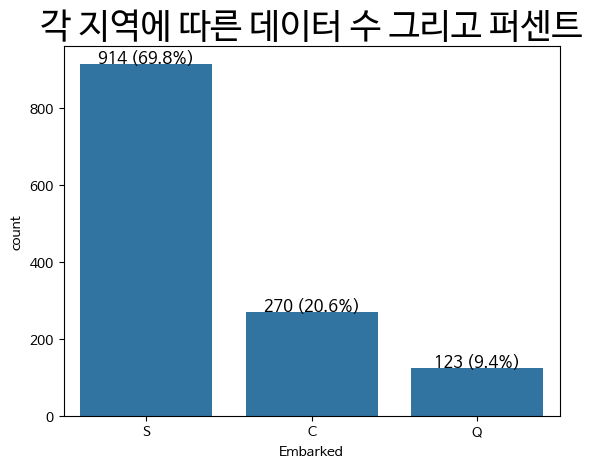

In [142]:
ax = sns.countplot(x='Embarked', data=tdf)

# 전체 개수
total = len(tdf)

# 막대 위에 텍스트 추가
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, f"{count} ({percent:.1f}%)", ha='center', fontsize=12);
plt.title("각 지역에 따른 데이터 수 그리고 퍼센트" , fontsize=25);

<Figure size 2500x600 with 0 Axes>

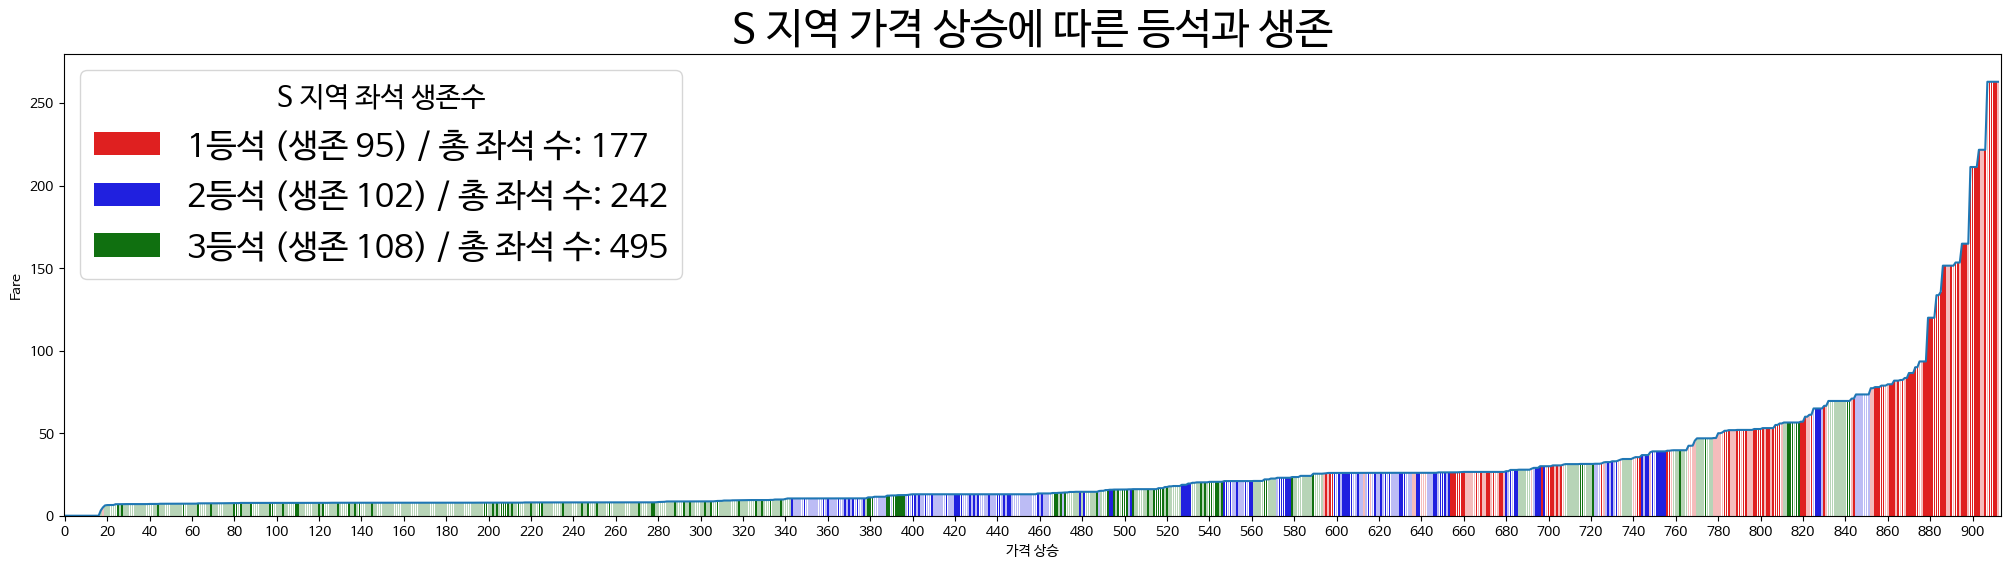

In [143]:
# S 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
plt.figure(figsize=(25, 6))
tdfS = tdf[tdf['Embarked'] == 'S']
tdfS = tdfS.sort_values(by=['Fare'] ,ascending=True)
tdfS.index = range(len(tdfS))
tdfa = tdfS[tdfS['Survived'] == 0]

plt.figure(figsize=(25, 6));
ax = sns.lineplot(x=tdfS.index, y='Fare', data=tdfS)
sns.barplot(x=tdfS.index, y='Fare', hue='Pclass', data=tdfS, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfS[tdfS['Survived'] == 0].index,y='Fare', data=tdfS[tdfS['Survived'] == 0], color='white', alpha=0.7)
plt.ylim(0, 280);
# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdf[(tdf['Survived'] == 1) & (tdf['Embarked'] == 'S')].groupby('Pclass').count()
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdf[tdf['Embarked'] == 'S'].groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석 (생존 " + str(name1) +") / 총 좌석 수: "+ str(nam1),
    2: "2등석 (생존 " + str(name2) +") / 총 좌석 수: "+ str(nam2),
    3: "3등석 (생존 " + str(name3) +") / 총 좌석 수: "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='S 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);

plt.xticks(ticks=np.arange(0, tdfS.shape[0], 20), labels=np.arange(0, tdfS.shape[0], 20));
plt.title("S 지역 가격 상승에 따른 등석과 생존" , fontsize=30);
plt.xlabel('가격 상승');

<Figure size 2500x600 with 0 Axes>

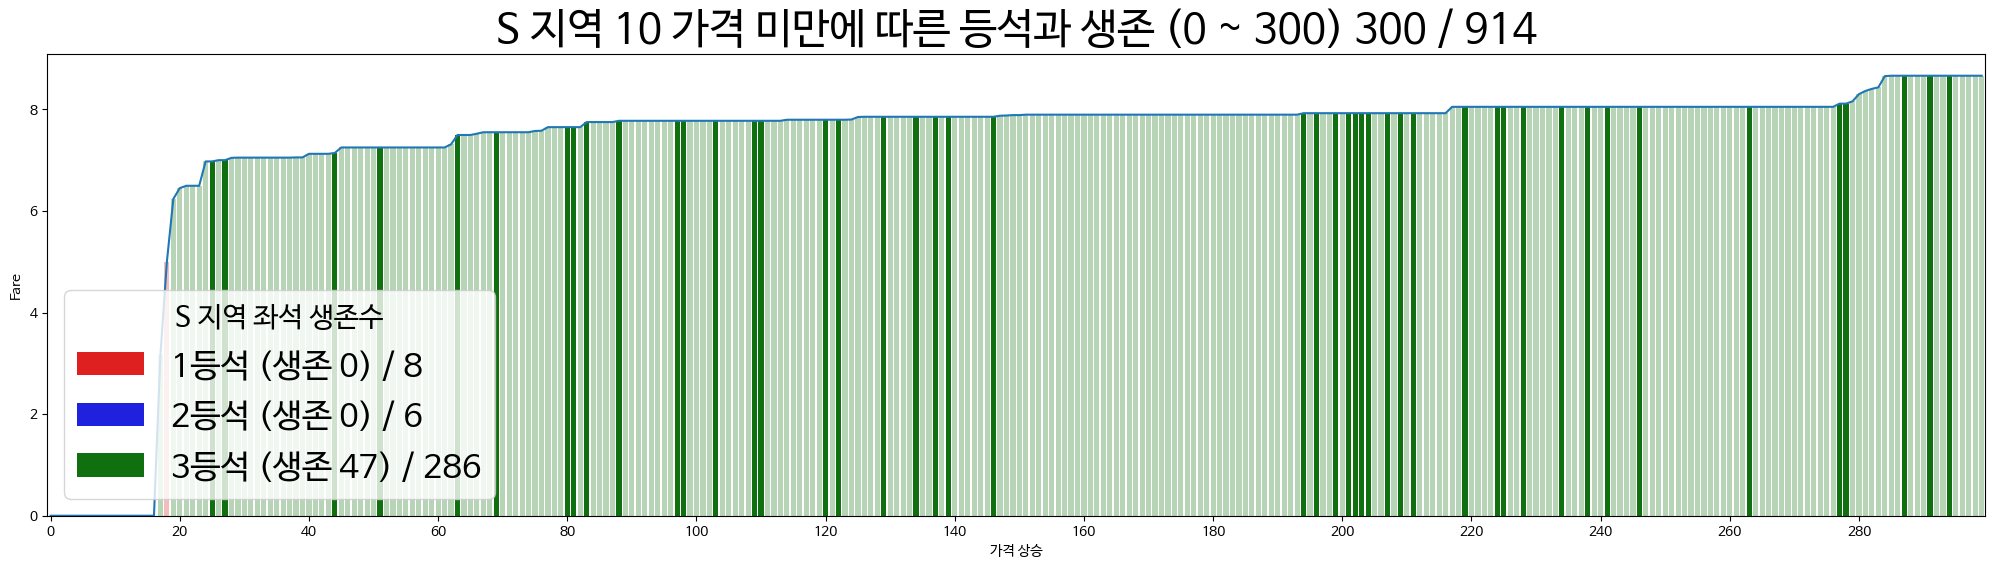

In [144]:
# S 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
plt.figure(figsize=(25, 6))
tdfS = tdf[tdf['Embarked'] == 'S'][:300]
tdfS = tdfS.sort_values(by=['Fare'] ,ascending=True)
tdfS.index = range(len(tdfS))
tdfa = tdfS[tdfS['Survived'] == 0]

plt.figure(figsize=(25, 6));
ax = sns.lineplot(x=tdfS.index, y='Fare', data=tdfS)
sns.barplot(x=tdfS.index, y='Fare', hue='Pclass', data=tdfS, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfS[tdfS['Survived'] == 0].index,y='Fare', data=tdfS[tdfS['Survived'] == 0], color='white', alpha=0.7)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdfS[(tdfS['Survived'] == 1)].groupby('Pclass').count().reindex([1,2,3], fill_value=0)
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdfS.groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석 (생존 " + str(name1) +") / "+ str(nam1),
    2: "2등석 (생존 " + str(name2) +") / "+ str(nam2),
    3: "3등석 (생존 " + str(name3) +") / "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='S 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);

plt.xticks(ticks=np.arange(0, tdfS.shape[0], 20), labels=np.arange(0, tdfS.shape[0], 20));
plt.title("S 지역 10 가격 미만에 따른 등석과 생존 (0 ~ 300) 300 / 914" , fontsize=30);
plt.xlabel('가격 상승');

<Figure size 2500x600 with 0 Axes>

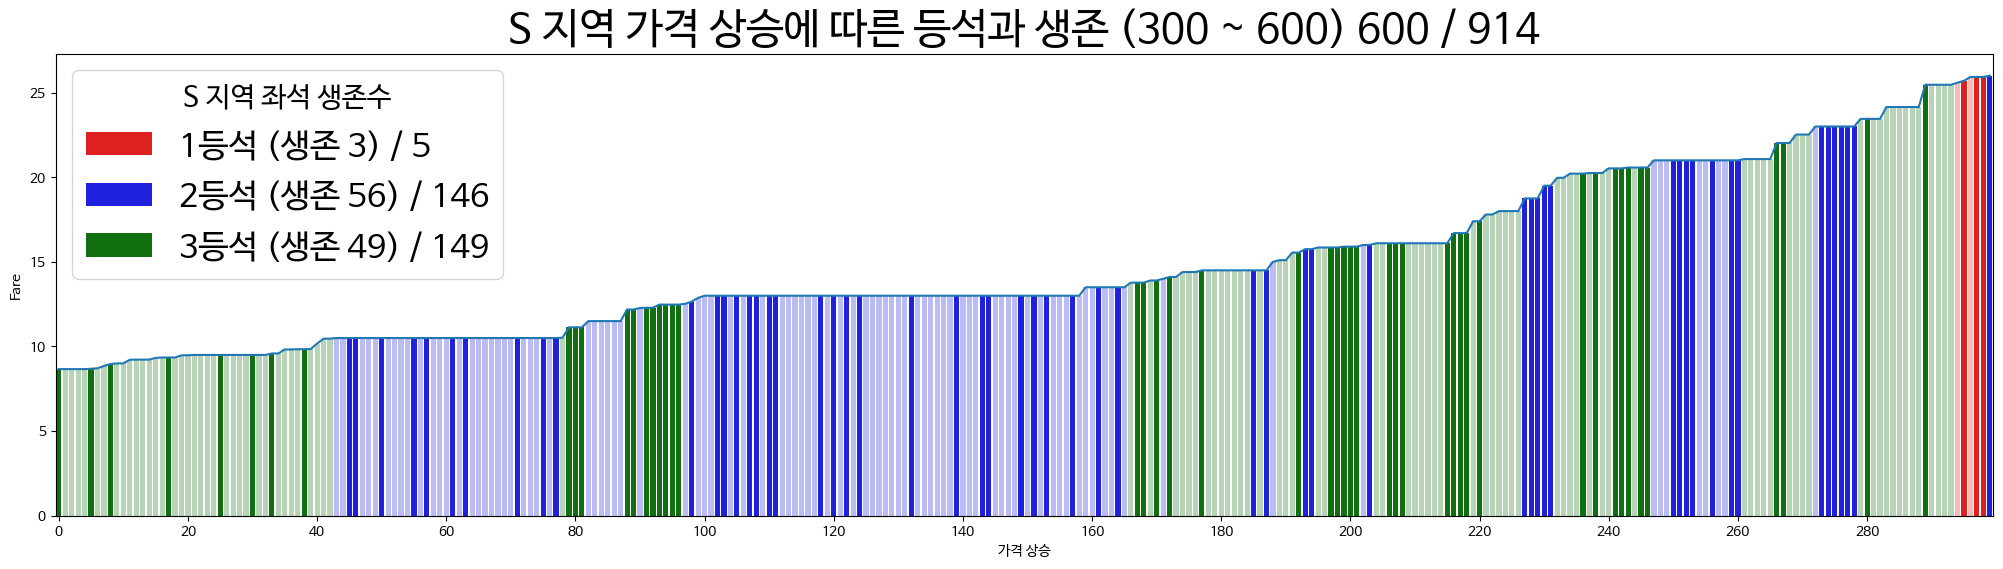

In [145]:
# S 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
plt.figure(figsize=(25, 6))
tdfS = tdf[tdf['Embarked'] == 'S'][300:600]
tdfS = tdfS.sort_values(by=['Fare'] ,ascending=True)
tdfS.index = range(len(tdfS))

tdfa = tdfS[tdfS['Survived'] == 0]

plt.figure(figsize=(25, 6));
ax = sns.lineplot(x=tdfS.index, y='Fare', data=tdfS)
sns.barplot(x=tdfS.index, y='Fare', hue='Pclass', data=tdfS, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfS[tdfS['Survived'] == 0].index,y='Fare', data=tdfS[tdfS['Survived'] == 0], color='white', alpha=0.7)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdfS[(tdfS['Survived'] == 1)].groupby('Pclass').count().reindex([1,2,3], fill_value=0)
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdfS.groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석 (생존 " + str(name1) +") / "+ str(nam1),
    2: "2등석 (생존 " + str(name2) +") / "+ str(nam2),
    3: "3등석 (생존 " + str(name3) +") / "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='S 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);

plt.xticks(ticks=np.arange(0, tdfS.shape[0], 20), labels=np.arange(0, tdfS.shape[0], 20));
plt.title("S 지역 가격 상승에 따른 등석과 생존 (300 ~ 600) 600 / 914" , fontsize=30);
plt.xlabel('가격 상승');

<Figure size 2500x600 with 0 Axes>

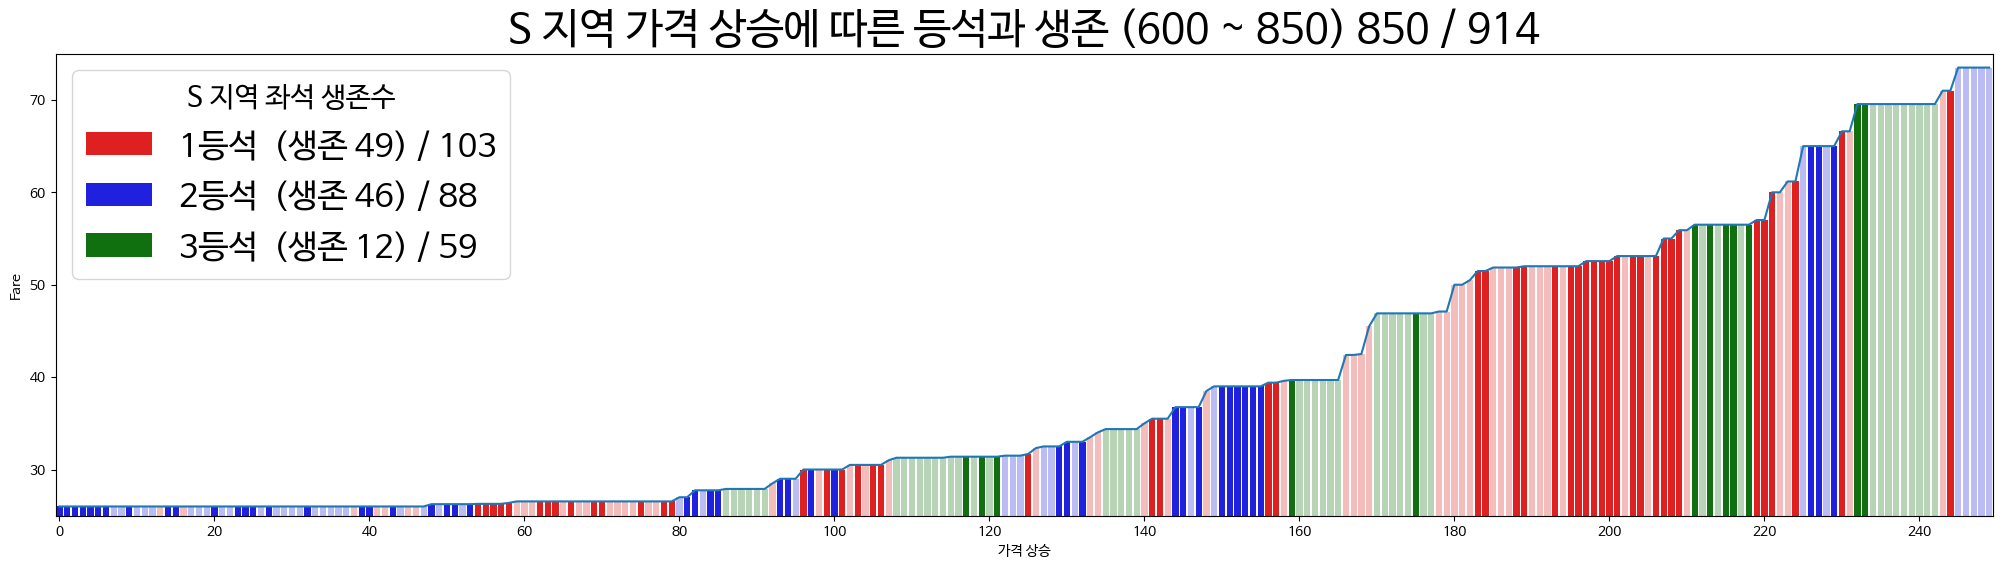

In [146]:
# S 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
plt.figure(figsize=(25, 6))
tdfS = tdf[tdf['Embarked'] == 'S'][600:850]
tdfS = tdfS.sort_values(by=['Fare'] ,ascending=True)
tdfS.index = range(len(tdfS))
tdfa = tdfS[tdfS['Survived'] == 0]

plt.figure(figsize=(25, 6));
ax = sns.lineplot(x=tdfS.index, y='Fare', data=tdfS)
sns.barplot(x=tdfS.index, y='Fare', hue='Pclass', data=tdfS, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfS[tdfS['Survived'] == 0].index,y='Fare', data=tdfS[tdfS['Survived'] == 0], color='white', alpha=0.7)
plt.ylim(25, 75);

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdfS[(tdfS['Survived'] == 1)].groupby('Pclass').count().reindex([1,2,3], fill_value=0)
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdfS.groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석  (생존 " + str(name1) +") / "+ str(nam1),
    2: "2등석  (생존 " + str(name2) +") / "+ str(nam2),
    3: "3등석  (생존 " + str(name3) +") / "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='S 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);

plt.xticks(ticks=np.arange(0, tdfS.shape[0], 20), labels=np.arange(0, tdfS.shape[0], 20));
plt.title("S 지역 가격 상승에 따른 등석과 생존 (600 ~ 850) 850 / 914" , fontsize=30);
plt.xlabel('가격 상승');

<Figure size 2500x600 with 0 Axes>

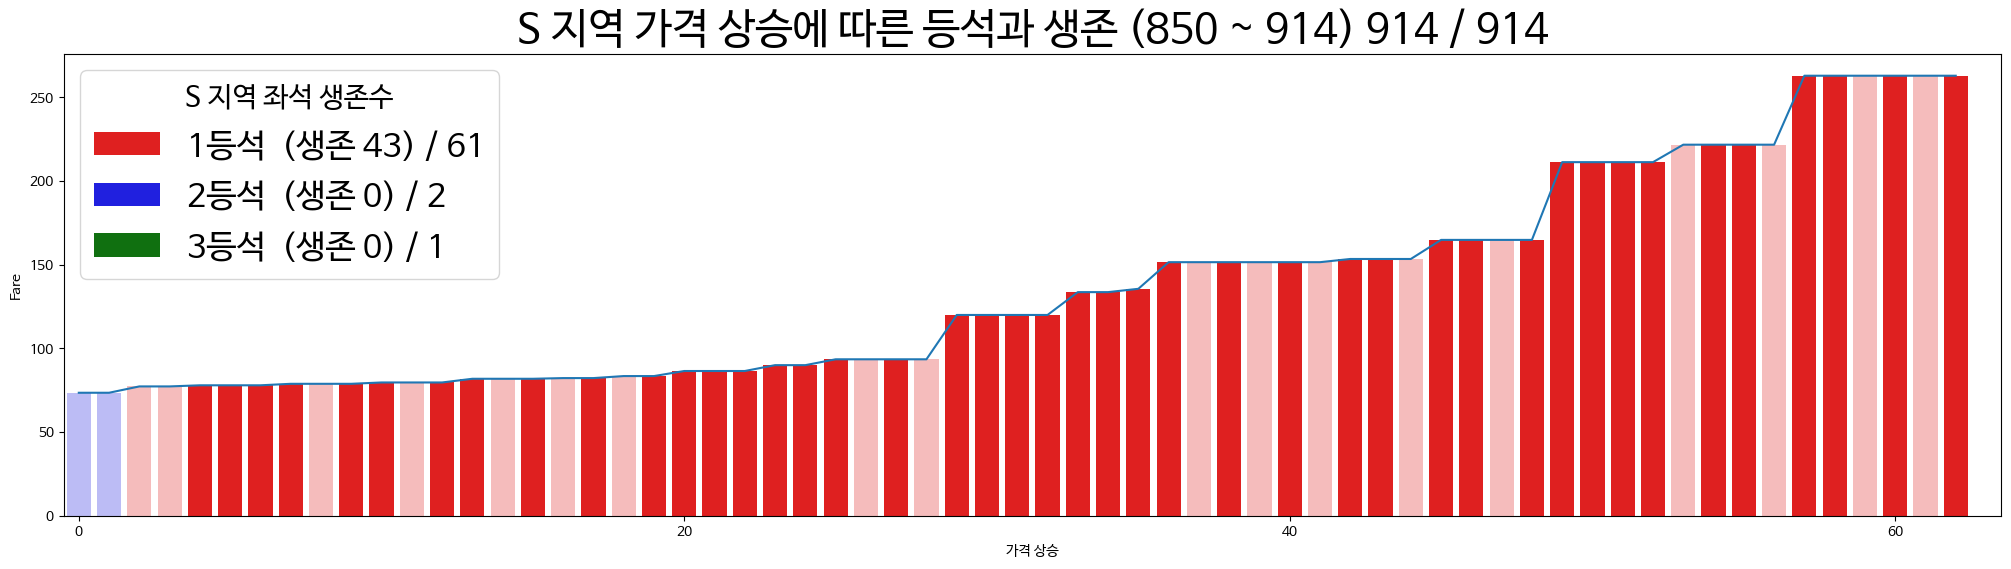

In [147]:
# S 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
plt.figure(figsize=(25, 6))
tdfS = tdf[tdf['Embarked'] == 'S'][850:]
tdfS = tdfS.sort_values(by=['Fare'] ,ascending=True)
tdfS.index = range(len(tdfS))
tdfa = tdfS[tdfS['Survived'] == 0]

plt.figure(figsize=(25, 6));
ax = sns.lineplot(x=tdfS.index, y='Fare', data=tdfS)
sns.barplot(x=tdfS.index, y='Fare', hue='Pclass', data=tdfS, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfS[tdfS['Survived'] == 0].index,y='Fare', data=tdfS[tdfS['Survived'] == 0], color='white', alpha=0.7)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdfS[(tdfS['Survived'] == 1)].groupby('Pclass').count().reindex([1,2,3], fill_value=0)
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdfS.groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석  (생존 " + str(name1) +") / "+ str(nam1),
    2: "2등석  (생존 " + str(name2) +") / "+ str(nam2),
    3: "3등석  (생존 " + str(name3) +") / "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='S 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);

plt.xticks(ticks=np.arange(0, tdfS.shape[0], 20), labels=np.arange(0, tdfS.shape[0], 20));
plt.title("S 지역 가격 상승에 따른 등석과 생존 (850 ~ 914) 914 / 914" , fontsize=30);
plt.xlabel('가격 상승');

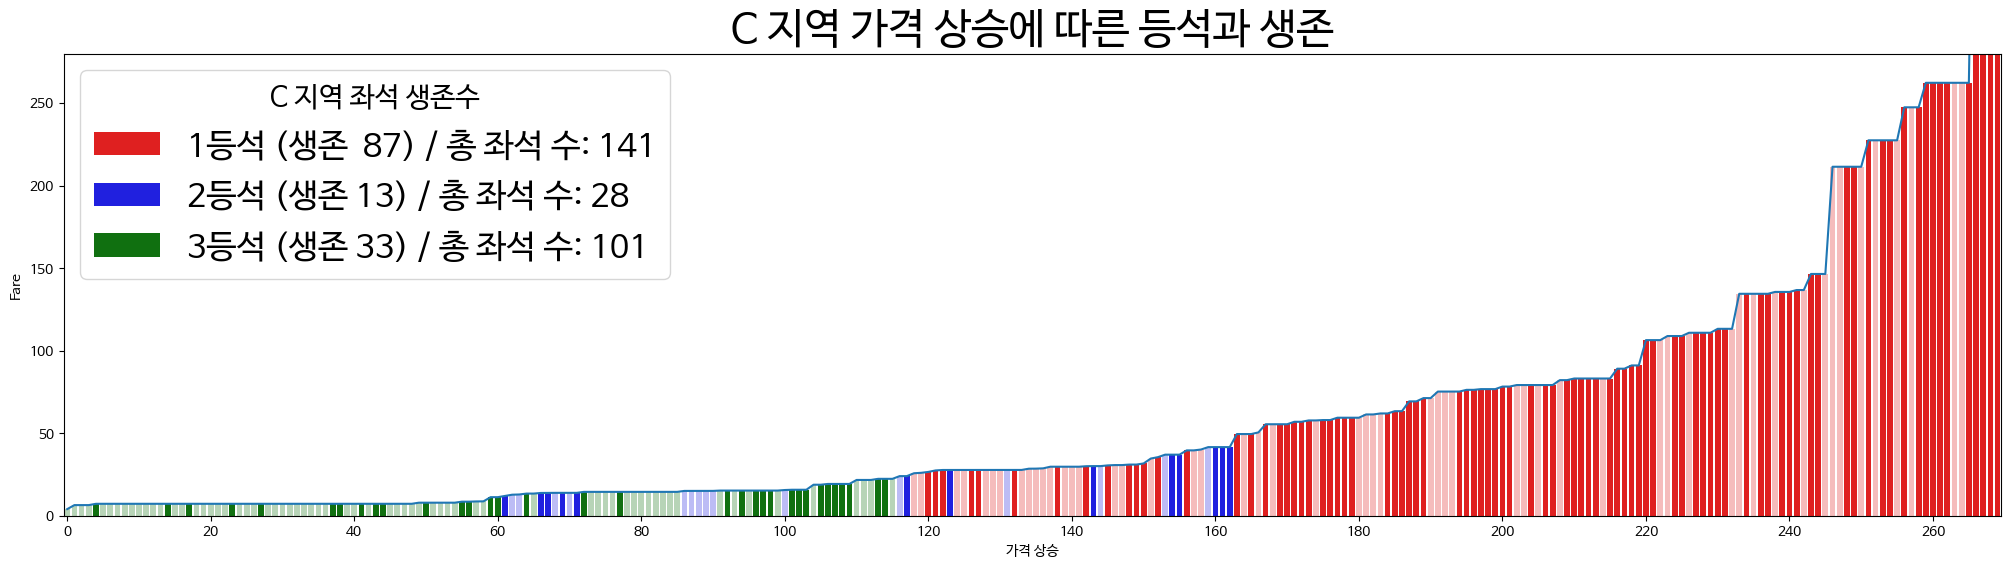

In [148]:
# C 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
tdfC = tdf[tdf['Embarked'] == 'C']
tdfC = tdfC.sort_values(by=['Fare'] ,ascending=True)
tdfC.index = range(len(tdfC))

plt.figure(figsize=(25, 6))
sns.lineplot(x=tdfC.index, y='Fare', data=tdfC)

ax = sns.barplot(x=tdfC.index, y='Fare', hue='Pclass', data=tdfC, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfC[tdfC['Survived'] == 0].index,y='Fare', data=tdfC[tdfC['Survived'] == 0], color='white' , alpha=0.7)
plt.ylim(0, 280)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdf[(tdf['Survived'] == 1) & (tdf['Embarked'] == 'C')].groupby('Pclass').count()
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdf[tdf['Embarked'] == 'C'].groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석 (생존  " + str(name1) +") / 총 좌석 수: "+ str(nam1),
    2: "2등석 (생존 " + str(name2) +") / 총 좌석 수: "+ str(nam2),
    3: "3등석 (생존 " + str(name3) +") / 총 좌석 수: "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='C 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);
plt.xticks(ticks=np.arange(0, tdfC.shape[0], 20), labels=np.arange(0, tdfC.shape[0], 20));
plt.title("C 지역 가격 상승에 따른 등석과 생존" , fontsize=30)
plt.xlabel('가격 상승');

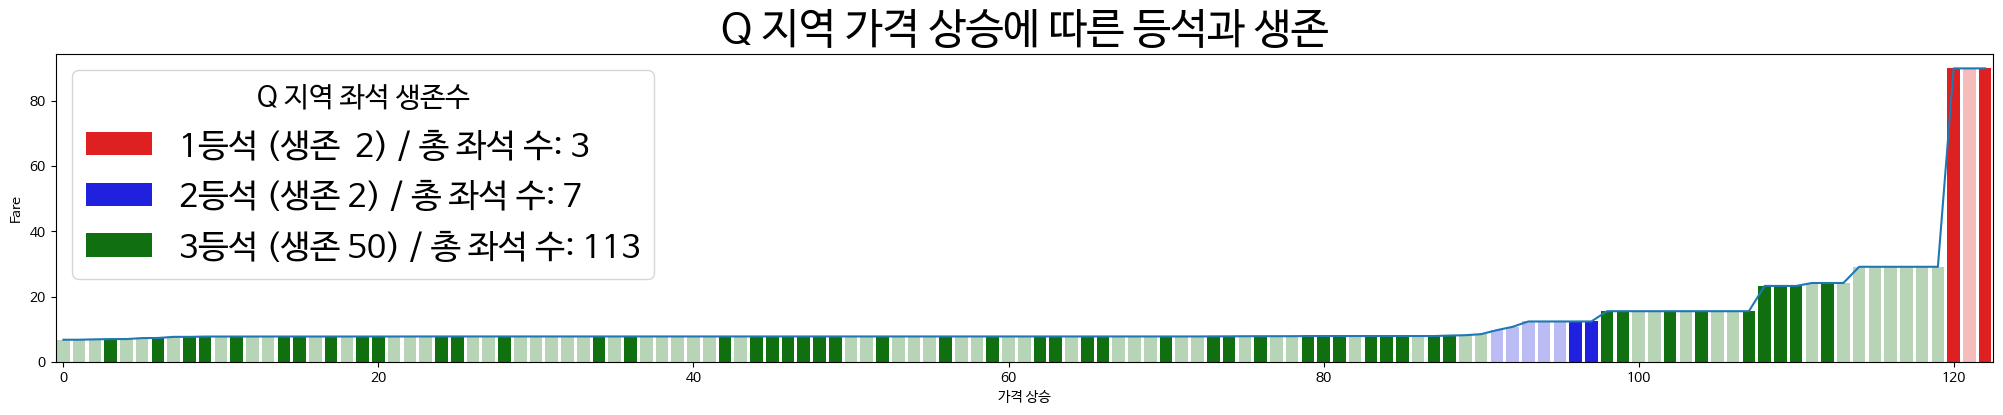

In [149]:
# Q 지역의 티켓 값의 증가에 대한 생환자들의 등석
tdfQ = tdf[tdf['Embarked'] == 'Q']
tdfQ = tdfQ.sort_values(by=['Fare'] ,ascending=True)
tdfQ.index = range(len(tdfQ))
tdfa = tdfQ[tdfQ['Survived'] == 0]
plt.figure(figsize=(25, 4))
sns.lineplot(x=tdfQ.index, y='Fare', data=tdfQ)
ax = sns.barplot(x=tdfQ.index, y='Fare', hue='Pclass', data=tdfQ, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfQ[tdfQ['Survived'] == 0].index,y='Fare', data=tdfQ[tdfQ['Survived'] == 0], color='white', alpha=0.7)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()
cC = tdf[(tdf['Survived'] == 1) & (tdf['Embarked'] == 'Q')].groupby('Pclass').count()
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdf[tdf['Embarked'] == 'Q'].groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "1등석 (생존  " + str(name1) +") / 총 좌석 수: "+ str(nam1),
    2: "2등석 (생존 " + str(name2) +") / 총 좌석 수: "+ str(nam2),
    3: "3등석 (생존 " + str(name3) +") / 총 좌석 수: "+ str(nam3)
}


newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='Q 지역 좌석 생존수' ,  fontsize=24, title_fontsize=20);
plt.xticks(ticks=np.arange(0, tdfQ.shape[0], 20), labels=np.arange(0, tdfQ.shape[0], 20));
plt.title("Q 지역 가격 상승에 따른 등석과 생존" , fontsize=30);
plt.xlabel('가격 상승');